In [240]:
import numpy as np
import torch

In [241]:
np.random.seed(45)
num_samples = 40
    
# Generate data
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3*x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

1. Use ```torch.autograd``` to find the true gradient on the above dataset using linear regression (in the form $\theta_1x + \theta_0$) for any given values of $(\theta_0,\theta_1)$. **[1 mark]**

In [242]:
from torch.autograd import Variable

x1_torch = torch.tensor(x1, dtype=torch.float32, requires_grad=False)
y_torch = torch.tensor(y, dtype=torch.float32, requires_grad=False)

theta_0 = Variable(torch.tensor(1.0), requires_grad=True)
theta_1 = Variable(torch.tensor(1.0), requires_grad=True)

def linear_model(x, theta_0, theta_1):
    return theta_1 * x  + theta_0

def loss_fn(y_pred, y):
    return ((y-y_pred)**2).mean()

y_pred = linear_model(x1_torch, theta_0, theta_1)
loss = loss_fn(y_pred, y_torch)
loss.backward()

print(f"True Gradient for theta_0: {theta_0.grad.item()}, theta_1: {theta_1.grad.item()}")
# print(x1_torch.shape)
# print(y_torch.shape)

True Gradient for theta_0: -5.616434097290039, theta_1: -0.5629974603652954


2. Using the same $(\theta_0,\theta_1)$ as above, calculate the stochastic gradient for all points in the dataset. Then, find the average of all those gradients and show that the stochastic gradient is a good estimate of the true gradient.  **[1 mark]**

In [243]:
def stochastic_gradients(x, y, theta_0, theta_1):
    gradients_theta_0 = []
    gradients_theta_1 = []
    for i in range(len(x)):
        theta_0_copy = Variable(theta_0.data.clone(), requires_grad=True)
        theta_1_copy = Variable(theta_1.data.clone(), requires_grad=True)
        
        y_pred = linear_model(x[i], theta_0_copy, theta_1_copy)
        loss = loss_fn(y_pred, y[i])
        loss.backward()

        # print(theta_0_copy.grad)
        # print(theta_1_copy.grad)

        gradients_theta_0.append(theta_0_copy.grad.item())
        gradients_theta_1.append(theta_1_copy.grad.item())
    
    avg_grad_theta_0 = np.mean(gradients_theta_0)
    avg_grad_theta_1 = np.mean(gradients_theta_1)

    return avg_grad_theta_0, avg_grad_theta_1

avg_grad_theta_0, avg_grad_theta_1 = stochastic_gradients(x1_torch, y_torch, theta_0, theta_1)

print(f"Stochastic Gradient (avg) for theta_0: {avg_grad_theta_0}, theta_1: {avg_grad_theta_1}")

Stochastic Gradient (avg) for theta_0: -5.616434770822525, theta_1: -0.5629974469542504


3. Implement full-batch, mini-batch and stochastic gradient descent. Calculate the average number of iterations required for each method to get sufficiently close to the optimal solution, where "sufficiently close" means within a distance of $\epsilon$ (or $\epsilon$-neighborhood)  from the minimum value of the loss function. Visualize the convergence process for 15 epochs. Choose $\epsilon = 0.001$ for convergence criteria. Which optimization process takes a larger number of epochs to converge, and why? Show the contour plots for different epochs (or show an animation/GIF) for visualisation of optimisation process. Also, make a plot for Loss v/s epochs for all the methods. **[2 marks]**

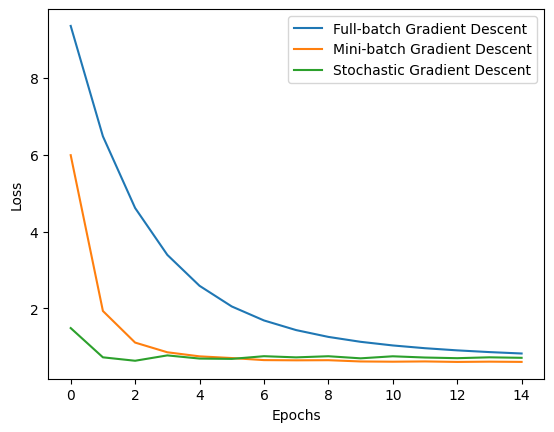

In [244]:
def gradient_descent(x, y, theta_0, theta_1, lr, batch_size=None, num_epochs=15, eps=1e-3):
    n = len(x)
    losses = []
    theta_0s = []
    theta_1s = []
    for epoch in range(num_epochs):
        indices = torch.randperm(n) if batch_size else torch.arange(n)
        total_loss = 0
        
        for i in range(0, n, batch_size or n):
            idx = indices[i:i+batch_size] if batch_size else indices
            x_batch, y_batch = x[idx], y[idx]
            
            # Zero gradients
            theta_0.grad = None
            theta_1.grad = None
            
            y_pred = linear_model(x_batch, theta_0, theta_1)
            loss = loss_fn(y_pred, y_batch)
            loss.backward()

            
            theta_0s.append(theta_0.item())
            theta_1s.append(theta_1.item())
            with torch.no_grad():
                theta_0 -= lr * theta_0.grad
                theta_1 -= lr * theta_1.grad
                
            total_loss += loss.item()
        
        avg_loss = total_loss / (n // (batch_size or n))
        losses.append(avg_loss)
        
        # Check for convergence
        if avg_loss < eps:
            print(f"Converged after {epoch+1} epochs")
            break
            
    return losses, theta_0s, theta_1s

import matplotlib.pyplot as plt

# Plot the loss for different methods
def plot_loss(full_batch_loss, mini_batch_loss, stochastic_loss):
    plt.plot(full_batch_loss, label="Full-batch Gradient Descent")
    plt.plot(mini_batch_loss, label="Mini-batch Gradient Descent")
    plt.plot(stochastic_loss, label="Stochastic Gradient Descent")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

lr = 0.1
theta_0 = Variable(torch.tensor(1.0), requires_grad=True)
theta_1 = Variable(torch.tensor(1.0), requires_grad=True)
full_batch_loss, full_batch_theta_0s, full_batch_theta_1s = gradient_descent(x1_torch, y_torch, theta_0, theta_1, lr, batch_size=None, num_epochs=15)

theta_0 = Variable(torch.tensor(1.0), requires_grad=True)
theta_1 = Variable(torch.tensor(1.0), requires_grad=True)
stochastic_loss,stochastic_theta_0s, stochastic_theta_1s = gradient_descent(x1_torch, y_torch, theta_0, theta_1, lr, batch_size=1, num_epochs=15)

theta_0 = Variable(torch.tensor(1.0), requires_grad=True)
theta_1 = Variable(torch.tensor(1.0), requires_grad=True)
mini_batch_loss, mini_batch_theta_0s, mini_batch_theta_1s = gradient_descent(x1_torch, y_torch, theta_0, theta_1, lr, batch_size=10, num_epochs=15)


# Plotting the loss vs. epochs for different methods
plot_loss(full_batch_loss, mini_batch_loss, stochastic_loss)

In [245]:
def roof(a,b):
    if (a%b==0):
        return a/b
    else:
        return a//b+1

In [246]:
x1_np = x1_torch.detach().cpu().numpy()
x1_np = np.vstack([x1_np, np.ones(x1_np.shape[0])])
x1_np = x1_np.T
y_np = y_torch.detach().cpu().numpy()

xt_x = x1_np.T @ x1_np
opt_theta = 0
# Check if xt_x is a scalar
if xt_x.size == 1:
    xt_x_inv = 1 / xt_x  # Inverse of scalar
    xt_x_inv = np.array([[xt_x_inv]])
    opt_theta = xt_x_inv @ np.array([[x1_np.T @ y_np]])

else:
    xt_x_inv = np.linalg.inv(xt_x)  # Inverse of matrix
    opt_theta = xt_x_inv @ (x1_np.T @ y_np)

# Compute optimal theta

y_pred = linear_model(x1_torch, torch.tensor(opt_theta[1], requires_grad=True), torch.tensor(opt_theta[0], requires_grad=True))
loss = loss_fn(y_pred, y_torch)
loss.backward()
# loss.item()/y_torch.mean()

optimum_loss = ((y_pred-y_torch)**2).mean()
optimum_loss = float(optimum_loss)
# print(((y_pred-y_torch)**2).mean())

epsilon = 0.001

epoches_full = []
epoches_mini = []
epoches_stoch = []

for i in range(10):
    theta_0 = Variable(torch.tensor(10.0), requires_grad=True)
    theta_1 = Variable(torch.tensor(10.0), requires_grad=True)
    loss, theta_0_list, theta_1_list = gradient_descent(x1_torch, y_torch, theta_0, theta_1, lr, batch_size=None, num_epochs=300)

    for i in range(300):
        if ((-float(optimum_loss)+loss[i])< epsilon):
            epoches_full.append(i)
            break
    theta_0 = Variable(torch.tensor(10.0), requires_grad=True)
    theta_1 = Variable(torch.tensor(10.0), requires_grad=True)
    loss, theta_0_list, theta_1_list = gradient_descent(x1_torch, y_torch, theta_0, theta_1, lr, batch_size=20, num_epochs=1000)

    for i in range(1000):
        if ((-float(optimum_loss)+loss[i])< epsilon):
            epoches_mini.append(i)
            break
    # print((-float(optimum_loss)+loss[i])<epsilon)
    theta_0 = Variable(torch.tensor(10.0), requires_grad=True)
    theta_1 = Variable(torch.tensor(10.0), requires_grad=True)
    loss, theta_0_list, theta_1_list = gradient_descent(x1_torch, y_torch, theta_0, theta_1, lr, batch_size=1, num_epochs=1000)

    for i in range(1000):
        if ((-float(optimum_loss)+loss[i])< epsilon):
            epoches_stoch.append(i)
            break

epoches_full = np.array(epoches_full)
epoches_mean_full = epoches_full.mean()
epoches_mini = np.array(epoches_mini)
epoches_mean_mini = epoches_mini.mean()
epoches_stoch = np.array(epoches_stoch)
epoches_mean_stoch = epoches_stoch.mean()
print("For full batch gradient descent it takes",int(epoches_mean_full), "epoches")
batch_size = x1_np.shape[0]
print("For full batch gradient descent it takes",int(epoches_mean_full * roof(x1_np.shape[0], batch_size)), "iterations")
print("For mini batch gradient descent it takes",int(epoches_mean_mini), "epoches")
batch_size = 20
print("For mini batch gradient descent it takes",int(epoches_mean_mini * roof(x1_np.shape[0], batch_size)), "iterations")
print("For stochastic gradient descent it takes",int(epoches_mean_stoch), "epoches")
batch_size = 1
print("For stochastic gradient descent it takes",int(epoches_mean_stoch * roof(x1_np.shape[0], batch_size)), "iterations")

For full batch gradient descent it takes 79 epoches
For full batch gradient descent it takes 79 iterations
For mini batch gradient descent it takes 46 epoches
For mini batch gradient descent it takes 93 iterations
For stochastic gradient descent it takes 91 epoches
For stochastic gradient descent it takes 3664 iterations


Full Batch GD typically requires fewer epochs to converge compared to stochastic methods because each update is made using the full information from the entire dataset, resulting in very stable, consistent steps towards the minimum.

Stochastic GD tends to take more epochs to converge because each update is based on only one example at a time, leading to a very noisy gradient estimation. This noise can sometimes be beneficial by helping to escape local minima, but it also makes convergence slower and less stable.

Mini Batch Gradient Descent strikes a balance between full batch and stochastic methods. This method can be faster than full batch because it requires less computation per iteration and can benefit from the more frequent updates, which might help escape local minima or saddle points more effectively.

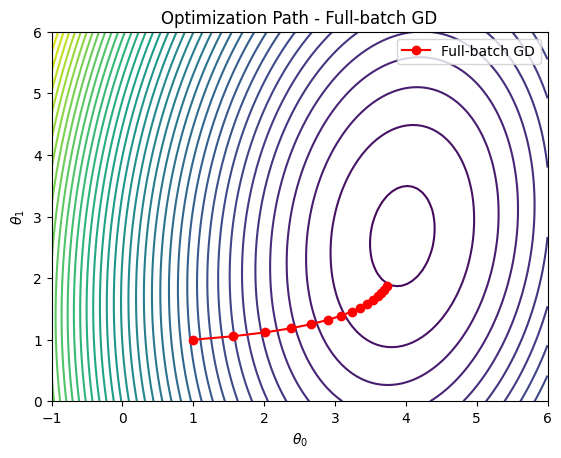

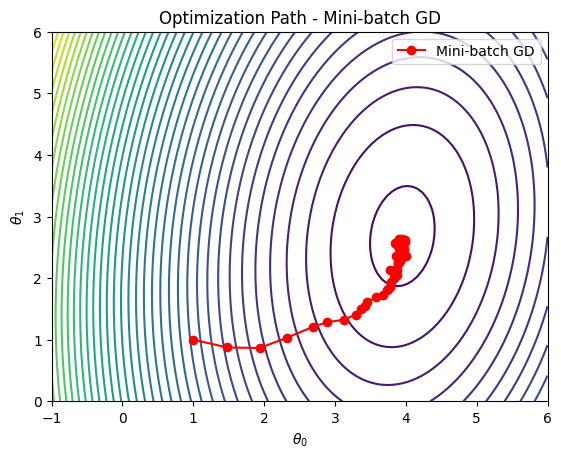

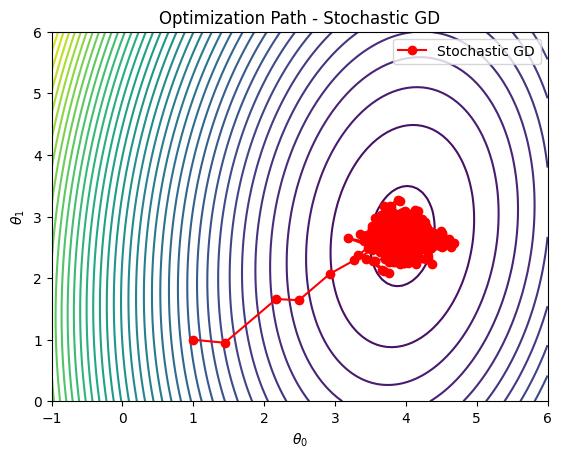

In [247]:
import numpy as np
import matplotlib.pyplot as plt

# Create a grid for the contour plot
theta_0_vals = np.linspace(-1, 6, 100)
theta_1_vals = np.linspace(0, 6, 100)
theta_0_grid, theta_1_grid = np.meshgrid(theta_0_vals, theta_1_vals)

# Function to compute loss for each point on the grid
def compute_loss_grid(theta_0_vals, theta_1_vals, x, y):
    loss = np.zeros_like(theta_0_vals)
    for i in range(len(theta_0_vals)):
        for j in range(len(theta_1_vals)):
            theta_0, theta_1 = theta_0_vals[i, j], theta_1_vals[i, j]
            y_pred = theta_1 * x + theta_0
            loss[i, j] = np.mean((y_pred - y)**2)
    return loss

# Compute the loss for the grid
loss_grid = compute_loss_grid(theta_0_grid, theta_1_grid, x1, y)

# Plot contour of the loss function
def plot_contours(theta_history, loss_history, method_name):
    plt.contour(theta_0_grid, theta_1_grid, loss_grid, levels=50, cmap='viridis')
    plt.plot([t[0] for t in theta_history], [t[1] for t in theta_history], 'ro-', label=method_name)
    plt.xlabel(r'$\theta_0$')
    plt.ylabel(r'$\theta_1$')
    plt.title(f'Optimization Path - {method_name}')
    plt.legend()
    plt.show()

# Dummy history data (you would collect this during the gradient descent process)
# This is just for example, replace it with real values from gradient descent
theta_history_full_batch = list(zip(full_batch_theta_0s,full_batch_theta_1s))
# print(theta_history_full_batch)
theta_history_mini_batch = list(zip(mini_batch_theta_0s,mini_batch_theta_1s))
theta_history_sgd = list(zip(stochastic_theta_0s,stochastic_theta_1s))

# Plot for full-batch, mini-batch, and stochastic gradient descent
plot_contours(theta_history_full_batch, full_batch_loss, "Full-batch GD")
plot_contours(theta_history_mini_batch, mini_batch_loss, "Mini-batch GD")
plot_contours(theta_history_sgd, stochastic_loss, "Stochastic GD")


4. Explore the article [here](https://machinelearningmastery.com/gradient-descent-with-momentum-from-scratch/#:~:text=Momentum%20is%20an%20extension%20to,spots%20of%20the%20search%20space.) on gradient descent with momentum. Implement gradient descent with momentum for the dataset. Visualize the convergence process for 15 steps. Compare the average number of steps taken with gradient descent (for variants full batch and stochastic) with momentum to that of vanilla gradient descent to converge to an $\epsilon$-neighborhood for both dataset. Choose $\epsilon = 0.001$. Write down your observations. Show the contour plots for different epochs for momentum implementation. Specifically, show all the vectors: gradient, current value of theta, momentum, etc. **[2 marks]**

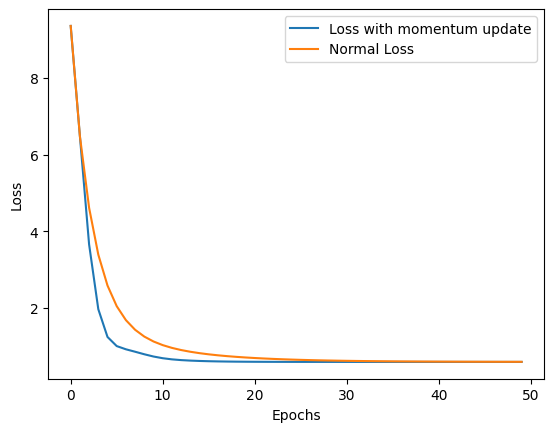

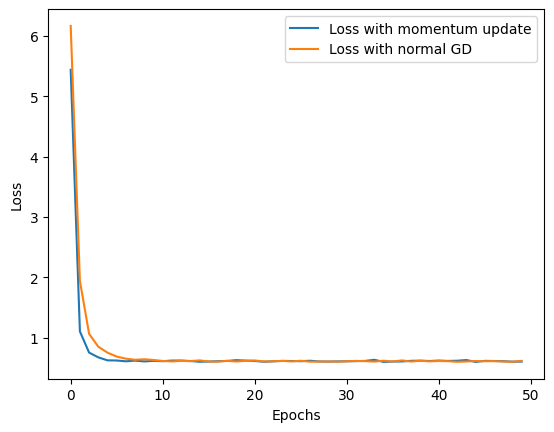

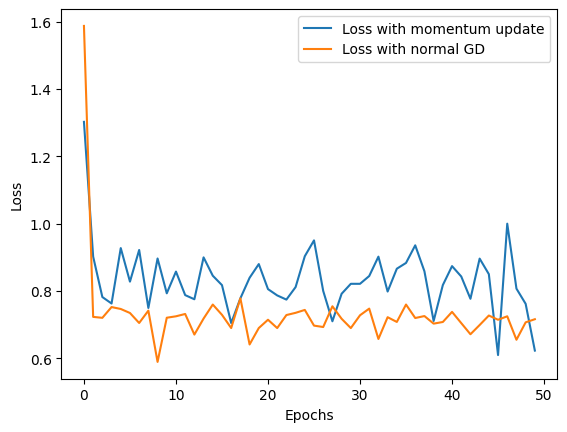

In [248]:
def gradient_descent_with_momentum(x, y, theta_0, theta_1, lr, gamma, batch_size=None, num_epochs=15, eps=1e-3):
    v_0, v_1 = 0, 0  # Initialize momentum terms
    n = len(x)
    losses = []

    for epoch in range(num_epochs):
        indices = torch.randperm(n) if batch_size else torch.arange(n)
        total_loss = 0
        
        for i in range(0, n, batch_size or n):
            idx = indices[i:i+batch_size] if batch_size else indices
            x_batch, y_batch = x[idx], y[idx]
            
            theta_0.grad = None
            theta_1.grad = None
            
            y_pred = linear_model(x_batch, theta_0, theta_1)
            loss = loss_fn(y_pred, y_batch)
            loss.backward()

            # Momentum update
            with torch.no_grad():
                v_0 = gamma * v_0 + lr * theta_0.grad
                v_1 = gamma * v_1 + lr * theta_1.grad
                
                theta_0 -= v_0
                theta_1 -= v_1

            total_loss += loss.item()

        avg_loss = total_loss / (n // (batch_size or n))
        losses.append(avg_loss)
        
        if avg_loss < eps:
            print(f"Converged after {epoch+1} epochs")
            break
    
    return losses

# Running gradient descent with momentum
theta_0 = Variable(torch.tensor(1.0), requires_grad=True)
theta_1 = Variable(torch.tensor(1.0), requires_grad=True)
momentum_loss_1 = gradient_descent_with_momentum(x1_torch, y_torch, theta_0, theta_1, lr=0.1, gamma=0.5, num_epochs=50)
theta_0 = Variable(torch.tensor(1.0), requires_grad=True)
theta_1 = Variable(torch.tensor(1.0), requires_grad=True)
full_batch_loss, full_batch_theta_0s, full_batch_theta_1s = gradient_descent(x1_torch, y_torch, theta_0, theta_1, lr, batch_size=None, num_epochs=50)
theta_0 = Variable(torch.tensor(1.0), requires_grad=True)
theta_1 = Variable(torch.tensor(1.0), requires_grad=True)
momentum_loss_2 = gradient_descent_with_momentum(x1_torch, y_torch, theta_0, theta_1, lr=0.1, gamma=0.5, batch_size=10, num_epochs=50)
theta_0 = Variable(torch.tensor(1.0), requires_grad=True)
theta_1 = Variable(torch.tensor(1.0), requires_grad=True)
mini_batch_loss, mini_batch_theta_0s, mini_batch_theta_1s = gradient_descent(x1_torch, y_torch, theta_0, theta_1, lr, batch_size=10, num_epochs=50)
theta_0 = Variable(torch.tensor(1.0), requires_grad=True)
theta_1 = Variable(torch.tensor(1.0), requires_grad=True)
momentum_loss_3 = gradient_descent_with_momentum(x1_torch, y_torch, theta_0, theta_1, lr=0.1, gamma=0.5, batch_size=1,num_epochs=50)
theta_0 = Variable(torch.tensor(1.0), requires_grad=True)
theta_1 = Variable(torch.tensor(1.0), requires_grad=True)
stochastic_loss, mini_batch_theta_0s, mini_batch_theta_1s = gradient_descent(x1_torch, y_torch, theta_0, theta_1, lr, batch_size=1, num_epochs=50)


plt.plot(momentum_loss_1, label="Loss with momentum update")
plt.plot(full_batch_loss, label="Normal Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.plot(momentum_loss_2, label="Loss with momentum update")
plt.plot(mini_batch_loss, label="Loss with normal GD")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.plot(momentum_loss_3, label="Loss with momentum update")
plt.plot(stochastic_loss, label="Loss with normal GD")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [249]:
x1_np = x1_torch.detach().cpu().numpy()
x1_np = np.vstack([x1_np, np.ones(x1_np.shape[0])])
x1_np = x1_np.T
y_np = y_torch.detach().cpu().numpy()

xt_x = x1_np.T @ x1_np
opt_theta = 0
# Check if xt_x is a scalar
if xt_x.size == 1:
    xt_x_inv = 1 / xt_x  # Inverse of scalar
    xt_x_inv = np.array([[xt_x_inv]])
    opt_theta = xt_x_inv @ np.array([[x1_np.T @ y_np]])

else:
    xt_x_inv = np.linalg.inv(xt_x)  # Inverse of matrix
    opt_theta = xt_x_inv @ (x1_np.T @ y_np)

# Compute optimal theta

y_pred = linear_model(x1_torch, torch.tensor(opt_theta[1], requires_grad=True), torch.tensor(opt_theta[0], requires_grad=True))
loss = loss_fn(y_pred, y_torch)
loss.backward()
# loss.item()/y_torch.mean()

optimum_loss = ((y_pred-y_torch)**2).mean()
optimum_loss = float(optimum_loss)
# print(((y_pred-y_torch)**2).mean())

epsilon = 0.001

epoches_full = []
epoches_mini = []
epoches_stoch = []

for i in range(10):
    theta_0 = Variable(torch.tensor(10.0), requires_grad=True)
    theta_1 = Variable(torch.tensor(10.0), requires_grad=True)
    loss= gradient_descent_with_momentum(x1_torch, y_torch, theta_0, theta_1, lr=0.1, gamma=0.5, batch_size=None,num_epochs=300)

    for i in range(300):
        if ((-float(optimum_loss)+loss[i])< epsilon):
            epoches_full.append(i)
            break
    theta_0 = Variable(torch.tensor(10.0), requires_grad=True)
    theta_1 = Variable(torch.tensor(10.0), requires_grad=True)
    loss= gradient_descent_with_momentum(x1_torch, y_torch, theta_0, theta_1, lr=0.1, gamma=0.5, batch_size=20,num_epochs=1000)

    for i in range(1000):
        if ((-float(optimum_loss)+loss[i])< epsilon):
            epoches_mini.append(i)
            break
    # print((-float(optimum_loss)+loss[i])<epsilon)
    theta_0 = Variable(torch.tensor(10.0), requires_grad=True)
    theta_1 = Variable(torch.tensor(10.0), requires_grad=True)
    loss= gradient_descent_with_momentum(x1_torch, y_torch, theta_0, theta_1, lr=0.01, gamma=0.5, batch_size=1,num_epochs=1000)

    for i in range(1000):
        if ((-float(optimum_loss)+loss[i])< epsilon):
            epoches_stoch.append(i)
            break

epoches_full = np.array(epoches_full)
epoches_mean_full = epoches_full.mean()
epoches_mini = np.array(epoches_mini)
epoches_mean_mini = epoches_mini.mean()
epoches_stoch = np.array(epoches_stoch)
epoches_mean_stoch = epoches_stoch.mean()
print("For full batch gradient descent it takes",int(epoches_mean_full), "epoches")
batch_size = x1_np.shape[0]
print("For full batch gradient descent it takes",int(epoches_mean_full * roof(x1_np.shape[0], batch_size)), "iterations")
print("For mini batch gradient descent it takes",int(epoches_mean_mini), "epoches")
batch_size = 20
print("For mini batch gradient descent it takes",int(epoches_mean_mini * roof(x1_np.shape[0], batch_size)), "iterations")
print("For stochastic gradient descent it takes",int(epoches_mean_stoch), "epoches")
batch_size = 1
print("For stochastic gradient descent it takes",int(epoches_mean_stoch * roof(x1_np.shape[0], batch_size)), "iterations")

For full batch gradient descent it takes 33 epoches
For full batch gradient descent it takes 33 iterations
For mini batch gradient descent it takes 20 epoches
For mini batch gradient descent it takes 41 iterations
For stochastic gradient descent it takes 212 epoches
For stochastic gradient descent it takes 8480 iterations


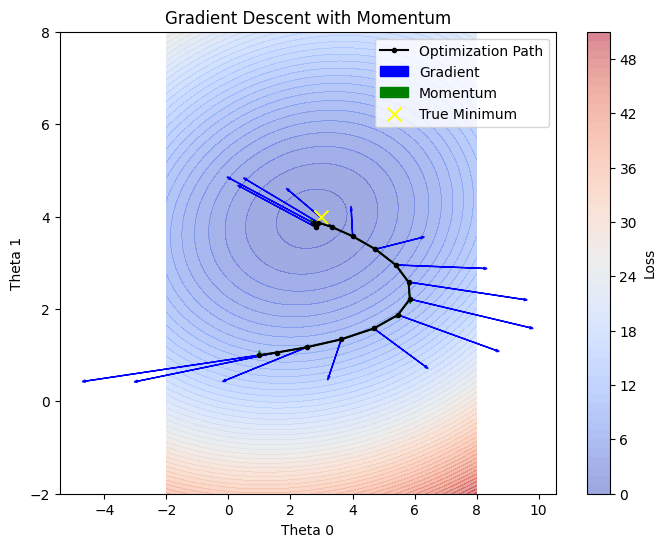

In [250]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# Function to implement gradient descent with momentum
def gradient_descent_with_momentum(x, y, theta_0, theta_1, lr, gamma, num_epochs=15, eps=1e-3):
    v_0, v_1 = 0, 0  # Initialize momentum terms
    optimizer_path = []  # To track the optimization path
    grad_path = []       # To track the gradients
    momentum_path = []   # To track the momentum
    
    for epoch in range(num_epochs):
        # Zero the gradients for each epoch
        theta_0.grad = None
        theta_1.grad = None
        
        # Compute prediction and loss
        y_pred = linear_model(x, theta_0, theta_1)
        loss = loss_fn(y_pred, y)
        loss.backward()

        # Momentum update
        with torch.no_grad():
            # Store current parameters, gradient, and momentum
            optimizer_path.append([theta_0.item(), theta_1.item()])
            grad_path.append([theta_0.grad.item(), theta_1.grad.item()])
            momentum_path.append([v_0, v_1])
            
            # Update velocities (momentum)
            v_0 = gamma * v_0 + lr * theta_0.grad
            v_1 = gamma * v_1 + lr * theta_1.grad

            # Update parameters
            theta_0 -= v_0
            theta_1 -= v_1

        if loss.item() < eps:
            print(f"Converged after {epoch+1} steps")
            break

    return optimizer_path, grad_path, momentum_path

# Example usage: Running gradient descent with momentum
theta_0 = Variable(torch.tensor(1.0), requires_grad=True)
theta_1 = Variable(torch.tensor(1.0), requires_grad=True)
optimizer_path, grad_path, momentum_path = gradient_descent_with_momentum(x1_torch, y_torch, theta_0, theta_1, lr=0.1, gamma=0.9, num_epochs=15)

# Contour plot with vectors for theta, gradient, and momentum
def plot_momentum_process(theta_0_vals, theta_1_vals, loss_surface, optimizer_path, grad_path, momentum_path, title):
    plt.figure(figsize=(8, 6))

    # Plot contour of the loss function
    plt.contourf(theta_0_vals, theta_1_vals, loss_surface, cmap='coolwarm', alpha=0.5, levels=50)
    plt.colorbar(label="Loss")
    
    # Convert paths to numpy arrays
    optimizer_path = np.array(optimizer_path)
    grad_path = np.array(grad_path)
    momentum_path = np.array(momentum_path)

    # Plot optimization path
    plt.plot(optimizer_path[:, 0], optimizer_path[:, 1], marker='o', color='black', markersize=3, label="Optimization Path")

    # Plot the momentum and gradient vectors at each step
    for i in range(len(optimizer_path)):
        # Current theta value
        theta_0, theta_1 = optimizer_path[i, 0], optimizer_path[i, 1]
        
        # Gradient vector
        grad_0, grad_1 = grad_path[i]
        plt.arrow(theta_0, theta_1, grad_0, grad_1, head_width=0.05, head_length=0.1, fc='blue', ec='blue', label="Gradient" if i == 0 else "")
        
        # Momentum vector
        mom_0, mom_1 = momentum_path[i]
        plt.arrow(theta_0, theta_1, mom_0, mom_1, head_width=0.05, head_length=0.1, fc='green', ec='green', label="Momentum" if i == 0 else "")

    # Plot the true minimum point
    plt.scatter([3], [4], color='yellow', marker='x', s=100, label='True Minimum')

    plt.title(title)
    plt.xlabel('Theta 0')
    plt.ylabel('Theta 1')
    plt.legend()
    plt.show()

def get_loss_surface(x1, y, theta_0_vals, theta_1_vals):
    loss_surface = np.zeros((len(theta_0_vals), len(theta_1_vals)))
    
    for i, theta_0 in enumerate(theta_0_vals):
        for j, theta_1 in enumerate(theta_1_vals):
            y_pred = theta_1 * x1 + theta_0
            loss_surface[i, j] = np.mean((y_pred - y) ** 2)
    
    return loss_surface

# Generate loss surface for visualization
theta_0_vals = np.linspace(-2, 8, 100)
theta_1_vals = np.linspace(-2, 8, 100)
loss_surface = get_loss_surface(x1, y, theta_0_vals, theta_1_vals)

# Plotting the momentum process
plot_momentum_process(theta_0_vals, theta_1_vals, loss_surface, optimizer_path, grad_path, momentum_path, "Gradient Descent with Momentum")


Momentum update is accelerating the process of GD which also makes sense logically as we are shrinking the theta by gradient descent as seen in the contour plot. Multiplying momentum factor will accelerate the shrinking process. In case theta has to increase, -@*gradient factor will take care about that. Comparison among full batch, mini batch and stochastic GD is similar to the normal GD. But all the GDs with momentum update are taking less number of epoches/iterations than normal one.

In [251]:
print(theta_0, theta_1)

tensor(3.1658, requires_grad=True) tensor(3.5903, requires_grad=True)
